## Recall the equations of motion

Consider particles with mass $m_i$, position $\mathbf x_i(t) \in \mathbb R^3$, and momentum $\mathbf p_i(t) \in \mathbb R^3$, indexed by $i \in \{ 1, \dotsc, n \}$.  Then their equation of motion is the ordinary differential equation

\begin{align}
  \dot{\mathbf x_i} &= \frac{\mathbf p_i}{m_i} \\
  \dot{\mathbf p_i} &= \sum_{j\ne i} \mathbf f_{ij} \\
\end{align}

where

$$ \mathbf f_{ij} = G m_i m_j \frac{\mathbf x_j - \mathbf x_i}{\lVert \mathbf x_j - \mathbf x_i \rVert^3} $$

is the force exerted on particle $i$ by particle $j$, and $G$ is the [gravitational constant](https://en.wikipedia.org/wiki/Gravitational_constant).

## Potential equations

Consider a scalar-valued field defined everywhere except at point charges,

$$ \phi(\mathbf x) = - \sum_{j=1}^n \frac{G m_j}{\lVert \mathbf x - \mathbf x_j \rVert} . $$

We call this the **gravitational potential** and define the vector

$$ \mathbf g(\mathbf x) = -\nabla \phi(\mathbf x) = \sum_{j=1}^n G m_j \frac{\mathbf x_j - \mathbf x}{\lVert \mathbf x - \mathbf x_j \rVert^3} $$

which we call the **gravitational field**.

This definition reminds us of $\mathbf f_{ij}$ above, the force applied to a mass $m_i$ at location $\mathbf x_i$ is

$$ \sum_{j \ne i} \mathbf f_{ij} = m_i \mathbf g(\mathbf x_i) $$

where $\mathbf g$ is defined from a sum not including $i$.

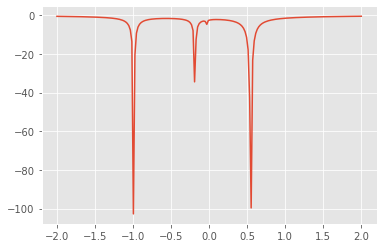

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def potential(m, x, xx):
    """Evaluate gravitational potential from point masses at locations x"""
    phi = np.zeros(xx.shape[0])
    for i in range(len(m)):
        phi -= m[i] / np.linalg.norm(x[i] - xx, axis=1)
    return phi

m = np.random.rand(5)
x = np.random.rand(5,1) * 2 - 1
xx = np.linspace(-2, 2, 200)[:, None]
phi = potential(m, x, xx)
plt.plot(xx, phi);

We need a way to
* exclude self-attraction from the potential
* avoid the need to represent the singularities in the potential
* evaluate the potential fast

We'll interpret the gravitational potential $\phi(\mathbf x)$ as an integral

$$ \phi(\mathbf x) = -G \int_{\mathbf x' \in \mathbb R^3} \frac{\rho(\mathbf x')}{\lVert \mathbf x - \mathbf x' \rVert} $$

in terms of the density distribution

\begin{align}
\rho(\mathbf x) &= \sum_i m_i \delta(\mathbf x - \mathbf x_i) \\
&= \underbrace{\sum_i m_i \delta(\mathbf x - \mathbf x_i) - \rho^{sm}(\mathbf x)}_{\text{local}} + \underbrace{\rho^{sm}(\mathbf x)}_{\text{smooth}} 
\end{align}

where $\delta(\mathbf x)$ is the [Dirac delta function](https://en.wikipedia.org/wiki/Dirac_delta_function) and $\rho^{sm}(\mathbf x)$ is chosen such that

$$ \int_{\mathbf x' \in \Omega} \frac{\rho^{sm}(\mathbf x')}{\lVert \mathbf x - \mathbf x' \rVert} \approx \int_{\mathbf x' \in \Omega} \frac{\rho(\mathbf x')}{\lVert \mathbf x - \mathbf x' \rVert} $$

whenever $\mathbf x$ is "far from" $\Omega \subset \mathbb R^3$.

The resulting algorithm works by
* compute smooth term via $\phi^{sm}(\mathbf x)$ from $\rho^{sm}(\mathbf x)$
* direct $O(n^2)$ force evaluation for close-range interactions (subtracting off the close-range smooth part)

## Computing the long-range part

We need a fast way to evaluate

$$ \phi^{sm}(\mathbf x) = -G \int_{\mathbf x' \in \mathbb R^3} \frac{\rho^{sm}(\mathbf x')}{\lVert \mathbf x - \mathbf x' \rVert} $$

which is the solution of a Poisson equation

$$ -\nabla\cdot \big( \nabla \phi^{sm} \big) = G \rho^{sm}(\mathbf x) . $$

### Fast evaluation

| Method | Complexity | Representation |
|--|--|--|
| Multigrid | $O(n)$ | field |
| Fast Fourier Transform | $O(n \log n)$ | field |
| Treecodes | $O(n \log n)$ | particle--multipole |
| Fast Multipole Method | $O(n)$ | particle--multipole, multipole-multipole, multipole--particle |

* [Comparison of scalable fast methods for long-range interactions](https://link.aps.org/pdf/10.1103/PhysRevE.88.063308)
* [An FMM Based on Dual Tree Traversal for Many-core Architectures](https://arxiv.org/abs/1209.3516) (compares different FMM representations)

![](yokota-treecodes.png)